### Libraries and Modules

The provided code imports various Python libraries and modules, each serving specific purposes in the data analysis and machine learning process.

- **pandas**: Used for data manipulation and analysis.
- **numpy**: Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions.
- **matplotlib.pyplot**: Enables data visualization through plotting.
- **sklearn.model_selection.train_test_split**: Used to split the dataset into training and testing sets.
- **sklearn.linear_model.LinearRegression**: Implements linear regression for modeling relationships between variables.
- **sklearn.ensemble.RandomForestRegressor**: Implements a random forest regressor for ensemble learning.
- **sklearn.preprocessing.StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
- **sklearn.preprocessing.OneHotEncoder**: Converts categorical integer features into one-hot encoded representations.
- **sklearn.compose.ColumnTransformer**: Applies transformers to columns of an array or DataFrame.
- **sklearn.metrics.mean_squared_error**: Calculates the mean squared error between predicted and true values.
- **sklearn.pipeline.Pipeline**: Chains multiple processes into a single unit, simplifying the workflow.
- **sklearn.cluster.KMeans**: Implements the k-means clustering algorithm.
- **sklearn.cluster.DBSCAN**: Implements the DBSCAN clustering algorithm.
- **sklearn.decomposition.PCA**: Performs principal component analysis for dimensionality reduction.
- **tensorflow**: An open-source machine learning framework.
- **tensorflow.keras.models.Sequential**: Represents a linear stack of layers for building neural networks.
- **tensorflow.keras.layers.Dense**: Implements densely-connected neural network layers.
- **tqdm**: Provides a progress bar for tracking the execution of loops.
- **itertools**: Offers various functions for creating iterators.

These libraries and modules collectively support tasks such as data loading, exploration, preprocessing, modeling, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tqdm import tqdm
import itertools
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import silhouette_score
import itertools


In [2]:

# Load the dataset
data = pd.read_csv('../data/raw/car_sales_data.csv')


In [3]:
data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
data.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [6]:
data.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


### Regression Models Comparison for Single Numerical Features

The provided code segment performs a comparative analysis of linear regression and polynomial regression models for predicting the target variable 'Price' based on each individual numerical feature ('Engine size', 'Year of manufacture', and 'Mileage').

1. **Data Preparation:**
    - Define the target variable 'y' as 'Price'.
    - Specify the list of numerical features to be analyzed: ['Engine size', 'Year of manufacture', 'Mileage'].

2. **Model Comparison Loop:**
    - Iterate over each numerical feature.
    - For each feature, split the data into training and testing sets.
    - Train a linear regression model and a polynomial regression model (degree=2).
    - Evaluate both models using mean squared error (MSE).
    - Determine and print the best-performing model for each feature.

3. **Overall Best Feature:**
    - Identify the overall best numerical feature based on the lowest MSE across all features.
    - Print the overall best feature and its corresponding MSE.

This section aids in identifying which individual numerical feature yields the most accurate predictions when considered in isolation.


In [7]:
    # Define the target variable 'y'
    y = data['Price']

    # Define a list of numerical features to analyze
    numerical_features = ['Engine size', 'Year of manufacture', 'Mileage']

    # Store MSE values for each feature
    mse_values = {}

    # Function to compare regression models for a single numerical feature
    def compare_regression_models(feature):
        X = data[[feature]]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a linear regression model
        model_linear = LinearRegression()
        model_linear.fit(X_train, y_train)
        predictions_linear = model_linear.predict(X_test)

        # Train a polynomial regression model (degree=2)
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)
        X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

        # Corrected: Create an instance of LinearRegression for the polynomial model
        model_poly = LinearRegression()
        model_poly.fit(X_train_poly, y_train_poly)
        predictions_poly = model_poly.predict(X_test_poly)

        # Evaluate models
        mse_linear = mean_squared_error(y_test, predictions_linear)
        mse_poly = mean_squared_error(y_test_poly, predictions_poly)

        # Determine the best model
        best_model = "Linear Regression" if mse_linear < mse_poly else "Polynomial Regression (Degree=2)"
        
        # Store MSE values for each feature
        mse_values[feature] = mse_linear if mse_linear < mse_poly else mse_poly

        print(f'Comparison for {feature}:')
        print(f'Mean Squared Error (Linear Regression): {mse_linear:,.2f}')
        print(f'Mean Squared Error (Polynomial Regression): {mse_poly:,.2f}')
        print(f'Best Model: {best_model}')
        print('\n')

    # Compare models for each numerical feature
    for feature in numerical_features:
        compare_regression_models(feature)

    # Determine the overall best feature
    best_feature = min(mse_values, key=mse_values.get)
    print(f'Overall Best Feature: {best_feature} with MSE: {mse_values[best_feature]:,.2f}')


Comparison for Engine size:
Mean Squared Error (Linear Regression): 230,499,154.45
Mean Squared Error (Polynomial Regression): 230,326,166.00
Best Model: Polynomial Regression (Degree=2)


Comparison for Year of manufacture:
Mean Squared Error (Linear Regression): 132,678,999.95
Mean Squared Error (Polynomial Regression): 105,993,894.20
Best Model: Polynomial Regression (Degree=2)


Comparison for Mileage:
Mean Squared Error (Linear Regression): 162,468,566.87
Mean Squared Error (Polynomial Regression): 129,620,312.16
Best Model: Polynomial Regression (Degree=2)


Overall Best Feature: Year of manufacture with MSE: 105,993,894.20


### Regression Model Comparison for Multiple Numerical Features

This section focuses on comparing the performance of a linear regression model when considering multiple numerical features simultaneously ('Engine size', 'Year of manufacture', and 'Mileage').

1. **Data Preparation:**
    - Define the target variable 'y' as 'Price'.
    - Select the list of numerical features for multi-feature analysis: ['Engine size', 'Year of manufacture', 'Mileage'].

2. **Model Training and Evaluation:**
    - Split the data into training and testing sets.
    - Train a linear regression model using the selected multiple numerical features.
    - Evaluate the model's performance using mean squared error (MSE).

3. **Results:**
    - Print the mean squared error for the linear regression model considering multiple features.

This segment assists in understanding how the inclusion of multiple numerical features affects the predictive accuracy of the linear regression model.


In [8]:
# Define the target variable 'y'
y = data['Price']

# Function to compare regression models with multiple numerical features
def compare_multi_feature_regression(features):
    X_multi = data[features]

    # Split the data into training and testing sets
    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

    # Train a linear regression model with multiple features
    model_multi = LinearRegression()
    model_multi.fit(X_train_multi, y_train_multi)
    predictions_multi = model_multi.predict(X_test_multi)

    # Evaluate the model
    mse_multi = mean_squared_error(y_test_multi, predictions_multi)

    # Print the results
    print(f'Comparison for Multiple Numerical Features ({", ".join(features)}):')
    print(f'Mean Squared Error (Multiple Features): {mse_multi:,.2f}')
    print('\n')

# Select multiple numerical features for analysis
selected_features_multi = ['Engine size', 'Year of manufacture', 'Mileage']

# Compare models with multiple numerical features
compare_multi_feature_regression(selected_features_multi)


Comparison for Multiple Numerical Features (Engine size, Year of manufacture, Mileage):
Mean Squared Error (Multiple Features): 89,158,615.76




### Random Forest Regressor with Numerical and Categorical Variables

This section focuses on utilizing a Random Forest Regressor model to predict car prices by considering both numerical and categorical features. The steps are as follows:

1. **Feature Definition:**
    - Define numerical features: ['Engine size', 'Year of manufacture', 'Mileage'].
    - Define categorical features: ['Manufacturer', 'Model', 'Fuel type'].

2. **Preprocessing Steps:**
    - Define preprocessing steps for numerical features using `StandardScaler`.
    - Define preprocessing steps for categorical features using `OneHotEncoder`.
    - Combine numerical and categorical transformers using `ColumnTransformer`.

3. **Pipeline Construction:**
    - Create a pipeline that includes preprocessing and a Random Forest Regressor with 100 estimators.

4. **Data Splitting:**
    - Split the data into training and testing sets.

5. **Model Training:**
    - Train the Random Forest Regressor model using the defined pipeline.

6. **Prediction and Evaluation:**
    - Make predictions on the testing set.
    - Evaluate the model's performance using mean squared error (MSE).

This pipeline incorporates both numerical and categorical information to enhance the predictive accuracy of the Random Forest Regressor model.


In [12]:
# Define numerical and categorical features
numerical_features = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

# Define preprocessing steps for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model_rf)
])

# Split the data into training and testing sets
X_all = data[numerical_features + categorical_features]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train the model
pipeline_rf.fit(X_train_all, y_train_all)

# Make predictions
predictions_all = pipeline_rf.predict(X_test_all)

# Evaluate the model
mse_all = mean_squared_error(y_test_all, predictions_all)
print(f'Mean Squared Error (Random Forest with Numerical and Categorical Variables): {mse_all:,.2f}')


Mean Squared Error (Random Forest with Numerical and Categorical Variables): 400,036.65


### Artificial Neural Network (ANN) Model

In this section, we implement an Artificial Neural Network (ANN) model to predict car prices. The steps are outlined as follows:

1. **Standardization of Numerical Features:**
    - Standardize numerical features ['Engine size', 'Year of manufacture', 'Mileage'] using `StandardScaler`.

2. **Architecture Definition:**
    - Define the architecture of the ANN model using Keras Sequential API.
    - The model consists of three layers:
        - Input layer with 128 neurons and ReLU activation.
        - Hidden layer with 64 neurons and ReLU activation.
        - Output layer with a single neuron for regression.

3. **Model Compilation:**
    - Compile the ANN model using the 'adam' optimizer and mean squared error loss function.

4. **Data Splitting for ANN:**
    - Split the standardized data into training and testing sets for the ANN model.

5. **Model Training:**
    - Train the ANN model for 10 epochs with a batch size of 32 and a validation split of 20%.

This section demonstrates the implementation and training of an ANN model for predicting car prices based on the specified numerical features.


In [13]:
# Standardize numerical features for the ANN model
scaler_ann = StandardScaler()
X_ann_scaled = scaler_ann.fit_transform(X_all[numerical_features])

# Define the architecture of the ANN model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_ann_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Split the data into training and testing sets for the ANN model
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann_scaled, y, test_size=0.2, random_state=42)

# Train the ANN model
model_ann.fit(X_train_ann, y_train_ann, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/10
1000/1000 - 7s - loss: 254352096.0000 - val_loss: 53321000.0000 - 7s/epoch - 7ms/step
Epoch 2/10
1000/1000 - 4s - loss: 52893744.0000 - val_loss: 46363104.0000 - 4s/epoch - 4ms/step
Epoch 3/10
1000/1000 - 5s - loss: 47602324.0000 - val_loss: 42073972.0000 - 5s/epoch - 5ms/step
Epoch 4/10
1000/1000 - 4s - loss: 43205344.0000 - val_loss: 37876696.0000 - 4s/epoch - 4ms/step
Epoch 5/10
1000/1000 - 5s - loss: 39107136.0000 - val_loss: 34312408.0000 - 5s/epoch - 5ms/step
Epoch 6/10
1000/1000 - 4s - loss: 35678216.0000 - val_loss: 31341622.0000 - 4s/epoch - 4ms/step
Epoch 7/10
1000/1000 - 4s - loss: 32787028.0000 - val_loss: 29111970.0000 - 4s/epoch - 4ms/step
Epoch 8/10
1000/1000 - 5s - loss: 30471940.0000 - val_loss: 27199442.0000 - 5s/epoch - 5ms/step
Epoch 9/10
1000/1000 - 5s - loss: 28748266.0000 - val_loss: 25892750.0000 - 5s/epoch - 5ms/step
Epoch 10/10
1000/1000 - 5s - loss: 27428424.0000 - val_loss: 25004704.0000 - 5s/epoch - 5ms/step


### K-Means Clustering

This section focuses on applying the k-means clustering algorithm to identify clusters in the car sales data. The process is outlined as follows:

1. **Input Features Selection:**
    - Define the numerical variables to use as input features, including 'Price', 'Engine size', 'Year of manufacture', and 'Mileage'.

2. **Optimal Clustering Exploration:**
    - Iterate over different combinations of input features using the `itertools.combinations` module.
    - For each feature combination:
        - Extract the input features.
        - Determine the optimal number of clusters (k) using the silhouette score.
        - Fit the k-means model with the optimal number of clusters.
        - Visualize the clustering results using scatter plots.

3. **Visualization and Subplots:**
    - Create subplots to visualize the clustering results for each feature combination.
    - Subplots include information about the optimal number of clusters, inertia, and silhouette score.

4. **Best Results Tracking:**
    - Keep track of the best clustering results based on the highest silhouette score.
    - Display the best results, including the features, the optimal number of clusters, inertia, and silhouette score.

This section provides a visual representation of the k-means clustering results for different combinations of input features, highlighting the optimal clusters based on silhouette scores.


Finding optimal k for ('Price', 'Engine size'): 100%|██████████| 9/9 [09:45<00:00, 65.06s/it]
Finding optimal k for ('Price', 'Year of manufacture'): 100%|██████████| 9/9 [09:07<00:00, 60.80s/it]
Finding optimal k for ('Price', 'Mileage'): 100%|██████████| 9/9 [08:46<00:00, 58.49s/it]
Finding optimal k for ('Engine size', 'Year of manufacture'): 100%|██████████| 9/9 [08:41<00:00, 57.96s/it]
Finding optimal k for ('Engine size', 'Mileage'): 100%|██████████| 9/9 [08:58<00:00, 59.85s/it]
Finding optimal k for ('Year of manufacture', 'Mileage'): 100%|██████████| 9/9 [08:42<00:00, 58.05s/it]


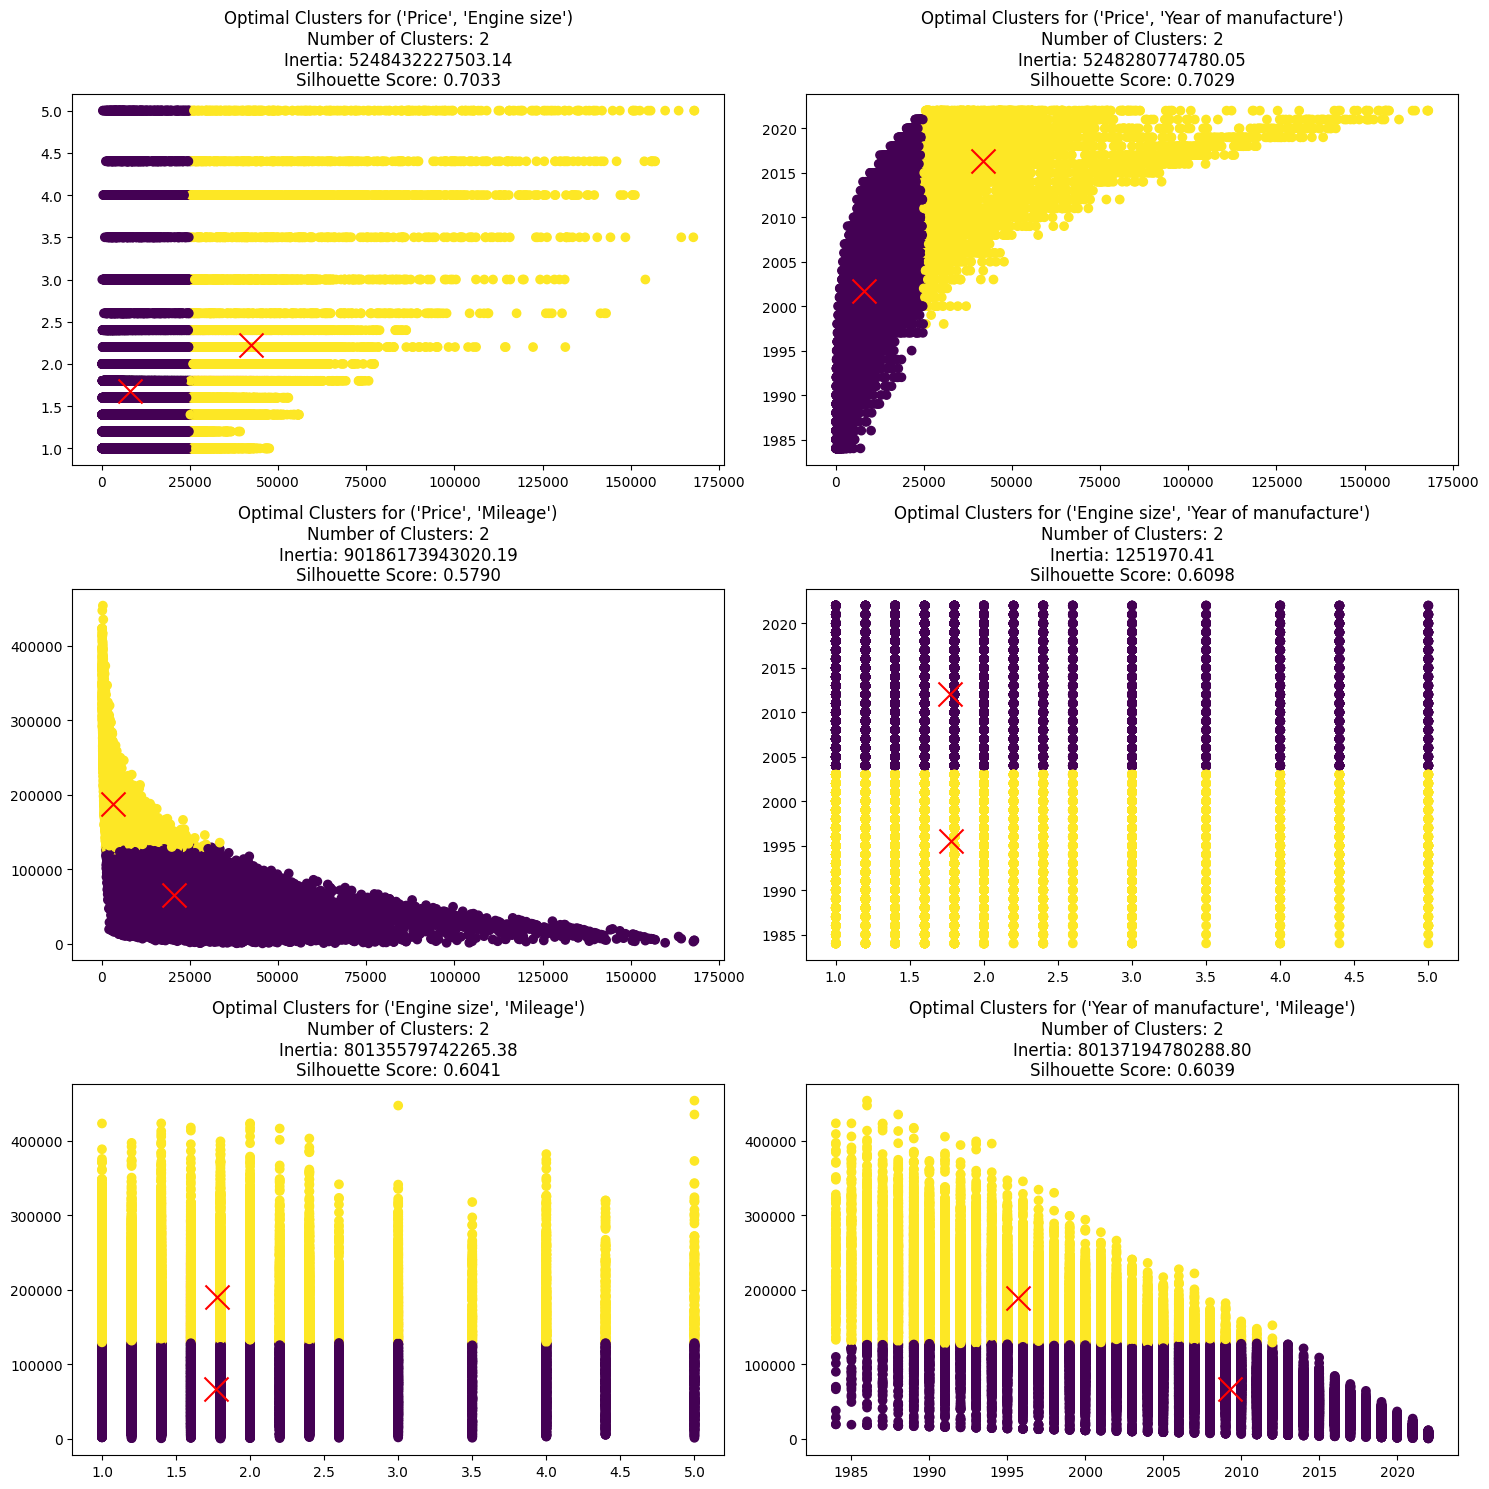


        Best Clustering Results         

Features            : ('Price', 'Engine size')
Number of Clusters  : 2
Inertia             : 5248432227503.14
Silhouette Score    : 0.7033



In [27]:


# Define the numerical variables to use as input features
features = ['Price', 'Engine size', 'Year of manufacture', 'Mileage']

# Keep track of the best results
best_results = {
    'features': None,
    'k_opt': 0,
    'inertia': float('inf'),
    'silhouette': 0
}

# Set the figure size for subplots
plt.figure(figsize=(15, 15))

# Counter for subplot index
subplot_index = 1

# Loop over different combinations of input features
for combo in itertools.combinations(features, 2):
    # Extract the input features
    X = data[list(combo)].values
    
    # Determine the optimal number of clusters using the silhouette score
    scores = []
    for k in tqdm(range(2, 11), desc="Finding optimal k for " + str(combo)):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    k_opt = np.argmax(scores) + 2
    
    # Fit the k-means model with the optimal number of clusters
    kmeans = KMeans(n_clusters=k_opt, n_init='auto')
    labels = kmeans.fit_predict(X)

    # Check if these results are the best so far
    if silhouette_score(X, labels) > best_results['silhouette']:
        best_results['features'] = combo
        best_results['k_opt'] = k_opt
        best_results['inertia'] = kmeans.inertia_
        best_results['silhouette'] = silhouette_score(X, labels)
    
    # Create subplots
    plt.subplot(3, 2, subplot_index)
    
    # Visualize the clustering results for the current pair
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
    plt.title(f'Optimal Clusters for {combo}\nNumber of Clusters: {k_opt}\nInertia: {kmeans.inertia_:.2f}\nSilhouette Score: {silhouette_score(X, labels):.4f}')
    
    # Increment subplot index
    subplot_index += 1



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Print the best results
print(f'\n{"="*40}\n{"Best Clustering Results":^40}\n{"="*40}')
print(f'\n{"Features":<20}: {best_results["features"]}\n{"Number of Clusters":<20}: {best_results["k_opt"]}\n{"Inertia":<20}: {best_results["inertia"]:.2f}\n{"Silhouette Score":<20}: {best_results["silhouette"]:.4f}\n{"="*40}\n')


### Clustering Algorithm Comparison

This section involves the comparison of two clustering algorithms: k-means and DBSCAN. The process is as follows:

1. **Features and Best Results Initialization:**
    - Define the numerical variables to use as input features.
    - Initialize tracking variables for the best results of k-means and DBSCAN.

2. **Optimal Clustering Exploration:**
    - Iterate over different combinations of input features using the `itertools.combinations` module.
    - For each feature combination:
        - Extract the input features.
        - Determine the optimal number of clusters using k-means and silhouette scores.
        - Fit DBSCAN for different values of epsilon (eps) and minimum samples, and evaluate using silhouette scores.
        - Track the best results for both k-means and DBSCAN.

3. **Display the Best Results:**
    - Print the best results for k-means, including features, the optimal number of clusters, inertia, and silhouette score.
    - Print the best results for DBSCAN, including features, epsilon (eps), minimum samples, and silhouette score.

This section concludes the clustering analysis, highlighting the optimal clustering results achieved by both k-means and DBSCAN algorithms.


In [10]:
# Define the numerical variables to use as input features
features = ['Price', 'Engine size', 'Year of manufacture', 'Mileage']

# Keep track of the best results for k-means
best_kmeans_results = {
    'features': None,
    'k_opt': 0,
    'inertia': float('inf'),
    'silhouette': 0
}

# Keep track of the best results for DBSCAN
best_dbscan_results = {
    'features': None,
    'eps': 0,
    'min_samples': 0,
    'silhouette': 0
}

# Loop over different combinations of input features
for combo in itertools.combinations(features, 2):
    # Extract the input features
    X = data[list(combo)].values
    
    # Determine the optimal number of clusters using k-means
    kmeans_scores = []
    for k in tqdm(range(2, 11), desc="Finding optimal k for " + str(combo)):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        kmeans_scores.append(score)
    
    k_opt_kmeans = np.argmax(kmeans_scores) + 2
    
    # Check if these k-means results are the best so far
    if kmeans_scores[-1] > best_kmeans_results['silhouette']:
        best_kmeans_results['features'] = combo
        best_kmeans_results['k_opt'] = k_opt_kmeans
        best_kmeans_results['inertia'] = kmeans.inertia_
        best_kmeans_results['silhouette'] = kmeans_scores[-1]
    
    # Fit DBSCAN
    dbscan_scores = []
    for eps in np.arange(0.1, 1.0, 0.1):
        for min_samples in range(2, 5):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels_dbscan = dbscan.fit_predict(X)
            if len(np.unique(labels_dbscan)) > 1:  # Avoid single cluster assignments
                score = silhouette_score(X, labels_dbscan)
                dbscan_scores.append((eps, min_samples, score))
    
    # Check if these DBSCAN results are the best so far
    best_eps, best_min_samples, best_silhouette_dbscan = max(dbscan_scores, key=lambda x: x[2])
    if best_silhouette_dbscan > best_dbscan_results['silhouette']:
        best_dbscan_results['features'] = combo
        best_dbscan_results['eps'] = best_eps
        best_dbscan_results['min_samples'] = best_min_samples
        best_dbscan_results['silhouette'] = best_silhouette_dbscan

# Print the best k-means results
print(f'\n{"="*40}\n{"Best k-means Clustering Results":^40}\n{"="*40}')
print(f'\n{"Features":<20}: {best_kmeans_results["features"]}\n{"Number of Clusters":<20}: {best_kmeans_results["k_opt"]}\n{"Inertia":<20}: {best_kmeans_results["inertia"]:.2f}\n{"Silhouette Score":<20}: {best_kmeans_results["silhouette"]:.4f}\n{"="*40}\n')

# Print the best DBSCAN results
print(f'\n{"="*40}\n{"Best DBSCAN Clustering Results":^40}\n{"="*40}')
print(f'\n{"Features":<20}: {best_dbscan_results["features"]}\n{"Eps":<20}: {best_dbscan_results["eps"]:.2f}\n{"Min Samples":<20}: {best_dbscan_results["min_samples"]}\n{"Silhouette Score":<20}: {best_dbscan_results["silhouette"]:.4f}\n{"="*40}\n')


Finding optimal k for ('Price', 'Engine size'): 100%|██████████| 9/9 [09:10<00:00, 61.19s/it]
Finding optimal k for ('Price', 'Year of manufacture'): 100%|██████████| 9/9 [08:54<00:00, 59.43s/it]
Finding optimal k for ('Price', 'Mileage'): 100%|██████████| 9/9 [08:23<00:00, 55.96s/it]
Finding optimal k for ('Engine size', 'Year of manufacture'): 100%|██████████| 9/9 [08:20<00:00, 55.58s/it]
Finding optimal k for ('Engine size', 'Mileage'): 100%|██████████| 9/9 [08:43<00:00, 58.11s/it]
Finding optimal k for ('Year of manufacture', 'Mileage'): 100%|██████████| 9/9 [08:23<00:00, 55.98s/it]



    Best k-means Clustering Results     

Features            : ('Price', 'Engine size')
Number of Clusters  : 2
Inertia             : 254403525780.34
Silhouette Score    : 0.5680


     Best DBSCAN Clustering Results     

Features            : ('Engine size', 'Year of manufacture')
Eps                 : 0.10
Min Samples         : 2
Silhouette Score    : 0.9998

